In [1]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
# Olhando o tamanho dos dados
print('Train data shape:', train.shape)
print('Test data shape:', test.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


In [5]:
# Olhando as primeiras linhas do dataset
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Importando o MatplotLib para vizualizar os dados
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [7]:
# Vendo informações sobre a váriavel dependente
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

A inclinação é: 1.8828757597682129


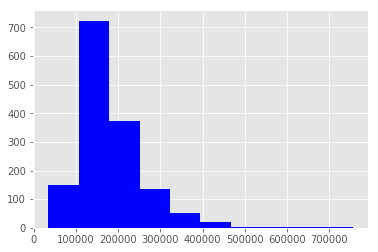

In [8]:
# Vizualizando um histograma de 'SalePrice'
print('A inclinação é:', train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

A inclinação é: 0.12133506220520406


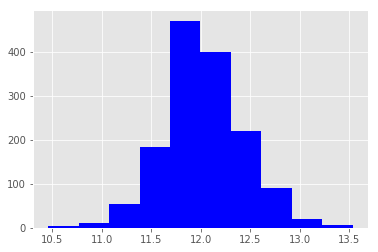

In [9]:
# Utilizando o 'np.log' para normalizar os dados
target = np.log(train.SalePrice)
print('A inclinação é:', target.skew())
plt.hist(target, color='blue')
plt.show()

In [11]:
# Criando um sub dataset de coluna numéricas
colnum = train.select_dtypes(include=[np.number])
colnum.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [12]:
# Verificando a correlação entre as colunas
corr = colnum.corr()

print(corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [13]:
# Utilizando o método ".unique()" para obter valores unicos de OverallQual
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [15]:
# Criando uma tabela dinâmica para ver a relação entre 'OverallQual' e 'SalePrice'
quality_pivot = train.pivot_table(index='OverallQual',                                 values='SalePrice', aggfunc=np.median)
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


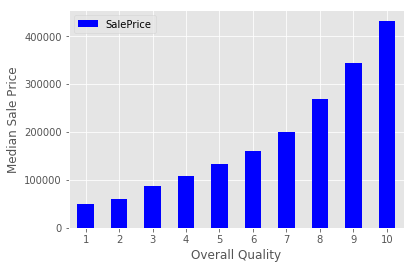

In [17]:
# Plotando um gráfico de barras para ter uma melhor visualização
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

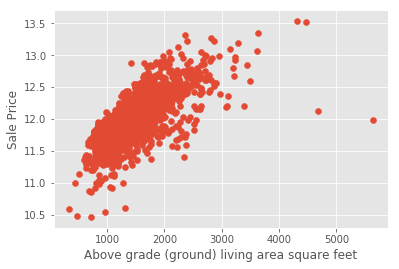

In [18]:
# Visualizando a relação entre a área da 'GrLivArea' e o preço
plt.scatter(x=train['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

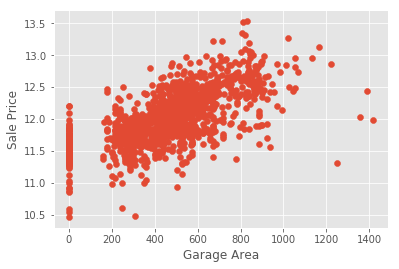

In [19]:
# Visualizando a relação entre a área da garagem e o preço
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

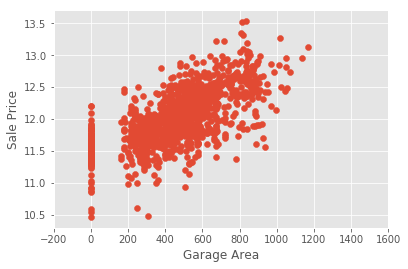

In [21]:
#  Removendo os outliers
train = train[train['GarageArea'] < 1200]

plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600) # mantendo a mesma escala de antes
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show

In [22]:
# Visualizando as principais colunas com valores nulos
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [23]:
# Visualizando valores unicos da coluna 'MiscFeature'
# Eles descrevem se a casa possui uma segunda garagem, um galpão com mais de 100 pés² e etc
print('Unique values are', train.MiscFeature.unique())

Unique values are [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [25]:
# Visualizando a colunas categóricas
colcat = train.select_dtypes(exclude=[np.number])
colcat.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


In [26]:
print("Original: \n")
print(train.Street.value_counts(), "\n")

Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



In [28]:
# Transformando os dados categóricos em numéricos
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

print("Encoded: \n")
print(train.enc_street.value_counts(), "\n")

Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64 



<function matplotlib.pyplot.show(*args, **kw)>

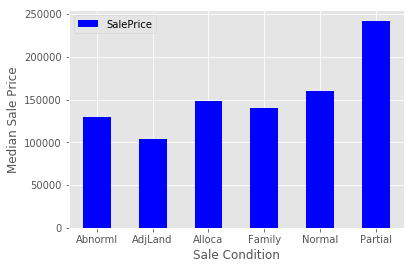

In [30]:
# Criando uma tabela dinâmica para ver a relação entre 'SaleCondition' e 'SalePrice' 
condition_pivot = train.pivot_table(index='SaleCondition',
                                   values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show

In [31]:
# Criando uma função para retornar 1 sempre que o valor for 'Partial' e 0 se não
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

<function matplotlib.pyplot.show(*args, **kw)>

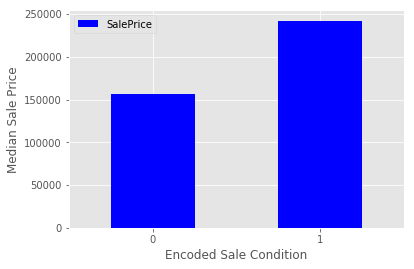

In [32]:
condition_pivot = train.pivot_table(index='enc_condition',
                                   values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show

In [33]:
# Substituindo valores ausentes pela média
data = train.select_dtypes(include=[np.number]).interpolate().dropna()
sum(data.isnull().sum() != 0)

0

In [34]:
# Definindo as várivaeis x e y para treinar o modelo
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [36]:
# Separando os dados de treino e teste
from sklearn.33model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .33)

In [37]:
# Criando o modelo
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [38]:
# Ajusatando o modelos aos nossos dados de treino
model = lr.fit(X_train, y_train)

In [40]:
# Analisando o valor de R²
print('R² é: \n', model.score(X_test, y_test))

R² é: 
 0.8882477709262591


In [41]:
# Fazendo previsões
pred = model.predict(X_test)

In [42]:
# Erro quadrado médio
from sklearn.metrics import mean_squared_error
print('RMSE é: \n', mean_squared_error(y_test, pred))

RMSE é: 
 0.01784179451956697


<function matplotlib.pyplot.show(*args, **kw)>

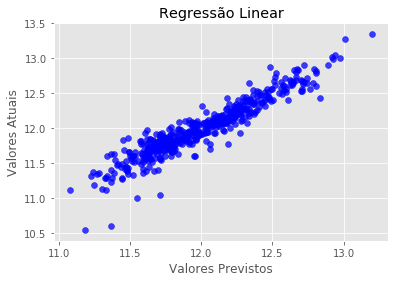

In [43]:
# Visualizando o Erro Quadrado médio graficamente
actual_values = y_test
plt.scatter(pred, actual_values, alpha=.75,
           color='b') # O alpha ajuda a ver valores sobrepostos
plt.xlabel('Valores Previstos')
plt.ylabel("Valores Atuais")
plt.title('Regressão Linear')
plt.show

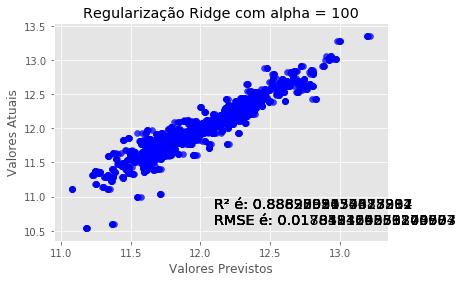

In [47]:
# Melhorando o modelo com a regularização Ridge ou L2
for i in range(-2, 3):
    alpha=10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Valores Previstos')
    plt.ylabel("Valores Atuais")
    plt.title('Regularização Ridge com alpha = {}'.format(alpha))
    overlay = 'R² é: {}\nRMSE é: {}'.format(
                ridge_model.score(X_test, y_test),
                mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay, xy=(12.1,10.6), size='x-large')
    plt.show
    # Mas não mudou muito do modelo normal

In [48]:
# Criando um Dataframe para gravar nosso resultado
submission = pd.DataFrame()
submission['Id'] = test.Id

In [49]:
# Fazendo nossas previsões
feats = test.select_dtypes(np.number).drop(['Id'], axis=1).interpolate()
pred = model.predict(feats)

In [50]:
# Revertendo nossas previsões para o correto
final_pred = np.exp(pred)

print('Predições Originais: \n', pred[:5], '\n')
print('Predições Finais: \n', final_pred[:5])

Predições Originais: 
 [11.76725362 11.71929504 12.07656074 12.20632678 12.11217655] 

Predições Finais: 
 [128959.49172586 122920.74024361 175704.82598102 200050.83263755
 182075.46986405]


In [52]:
# Inserindo nossas previsões no DataFrame
submission['SalePrice'] = final_pred
submission.head()

,Id,SalePrice
0,1461,128959.491726
1,1462,122920.740244
2,1463,175704.825981
3,1464,200050.832638
4,1465,182075.469864


In [53]:
# Salvando o Datframe em um arquivo csv para enviar a Kaggle
submission.to_csv('submission.csv', index=False)